## 1. Installing dependencies

#### Explanation:

This command installs essential libraries using the `pip` package manager, which is necessary for our machine learning project. Here’s what each package does:

1.  **`torch`**:
    
    -   PyTorch, one of the most popular machine learning frameworks, allows us to build and train deep learning models. It provides the necessary modules for handling tensors, model layers, optimizers, and more.
2.  **`torchvision`**:
    
    -   A library that extends PyTorch to work specifically with computer vision tasks. It includes common datasets, model architectures (like ResNet), and image transformation functions that make it easy to preprocess and load images for training and inference.
3.  **`matplotlib`**:
    
    -   A visualization library for Python. Here, it’s useful for plotting data and viewing images, such as showing training loss and accuracy trends or displaying example images with predictions.
4.  **`opencv-python`**:
    
    -   OpenCV (Open Source Computer Vision) is a library focused on real-time computer vision. It provides tools for image processing, such as resizing, augmenting, and manipulating images, making it a useful tool for pre-processing X-ray images in our project.

In [1]:
!pip install torch torchvision matplotlib opencv-python


## 2. Importing KaggleHub and Downloading the Dataset

#### Explanation:

1.  **`import kagglehub`**:
    
    -   This imports the `kagglehub` library, which provides a simple interface for downloading datasets directly from Kaggle. With `kagglehub`, we can easily access public datasets hosted on Kaggle without manually navigating the website or dealing with authentication tokens.
2.  **`path = kagglehub.dataset_download("shashwatwork/knee-osteoarthritis-dataset-with-severity")`**:
    
    -   This line downloads the specified dataset directly from Kaggle.
    -   `"shashwatwork/knee-osteoarthritis-dataset-with-severity"` is the dataset identifier on Kaggle, corresponding to a collection of X-ray images graded for knee osteoarthritis severity.
    -   The function `dataset_download` retrieves the dataset and stores it locally. The `path` variable holds the file path to the downloaded dataset, which is useful for loading images into our model later.
3.  **`print("Path to dataset files:", path)`**:
    
    -   This simply prints the path to the dataset folder. It allows you to confirm the location of the dataset files, which can be important for organizing your code and loading data correctly.

In [2]:
import kagglehub

path = kagglehub.dataset_download("shashwatwork/knee-osteoarthritis-dataset-with-severity")
print("Path to dataset files:", path)

100%|██████████| 204M/204M [00:02<00:00, 85.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1


## 3. Exploring the Dataset Structure

#### Explanation:

1.  **`import os`**:
    
    -   The `os` module in Python provides functions to interact with the operating system, including file and directory handling.
2.  **`for dirpath, dirnames, filenames in os.walk(path):`**:
    
    -   `os.walk(path)` is a generator that recursively traverses the directory specified by `path`.
    -   It returns three components:
        -   **`dirpath`**: The current directory path being processed.
        -   **`dirnames`**: A list of subdirectories within the current directory.
        -   **`filenames`**: A list of files within the current directory (typically, image files in this dataset).
    -   This loop goes through each directory and its subdirectories to gather all file names, which in our case are X-ray images labeled by osteoarthritis grade (e.g., `0`, `1`, `2`, `3`, `4` for the KL grading scale).
3.  **`print(f"Directory: {dirpath}, Number of images: {len(filenames)}")`**:
    
    -   For each directory in the dataset, this line prints the path of the directory (`dirpath`) and the number of images it contains (`len(filenames)`).
    -   This is useful for verifying that the dataset is structured as expected, and it gives an overview of the number of images available in each grade category.

This code allows you to confirm that all data is correctly organized and identify the number of images per class (e.g., Grade 0, Grade 1) for training.

In [3]:
import os

for dirpath, dirnames, filenames in os.walk(path):
    print(f"Directory: {dirpath}, Number of images: {len(filenames)}")


Directory: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1, Number of images: 0
Directory: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1/train, Number of images: 0
Directory: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1/train/2, Number of images: 1516
Directory: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1/train/3, Number of images: 757
Directory: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1/train/1, Number of images: 1046
Directory: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1/train/4, Number of images: 173
Directory: /root/.cache/kagglehub/datasets/shashwatwork/knee-osteoarthritis-dataset-with-severity/versions/1/train/0, Number of images: 2286
Directory: /root/.cache/kaggleh

## 4. Setting Up Data Transformations and Loaders

#### Explanation:

1.  **Imports**:
    
    -   **`torch`** and **`torchvision.transforms`**: Used for defining transformations to prepare image data for the model.
    -   **`ImageFolder`**: A `torchvision` utility that loads images from a directory structured by class folders. It assigns labels based on folder names.
    -   **`DataLoader`**: A PyTorch class that enables batch loading, shuffling, and parallel processing of data.
2.  **Image Size**:
    
    -   **`IMG_SIZE = 224`** sets the desired image size for all images, which is commonly used in models like ResNet.
3.  **Transformations**:
    
    -   **`train_transform`**:
        -   **`Resize((IMG_SIZE, IMG_SIZE))`**: Resizes all images to the defined `IMG_SIZE` (224x224 pixels).
        -   **`RandomHorizontalFlip()`**: Applies random horizontal flipping to augment the dataset.
        -   **`RandomRotation(15)`**: Randomly rotates images up to ±15 degrees, adding diversity.
        -   **`ToTensor()`**: Converts the image to a PyTorch tensor.
        -   **`Normalize(mean, std)`**: Normalizes the image using the specified mean and standard deviation, which aligns with pre-trained models’ expectations.
    -   **`val_transform`**:
        -   Similar to `train_transform`, but without `RandomHorizontalFlip` or `RandomRotation`, since we don’t want augmentation on validation and test data.
4.  **Loading the Dataset**:
    
    -   **`ImageFolder`**:
        -   Loads images from directories (`train`, `val`, and `test` folders) and applies the transformations.
        -   **`train_dataset`**: Loads training data with `train_transform`.
        -   **`val_dataset`** and **`test_dataset`**: Load validation and test data with `val_transform`.
5.  **Creating DataLoaders**:
    
    -   **`DataLoader`**:
        -   Wraps the datasets to enable efficient data handling in batches, which helps in managing memory and speeds up training.
        -   **`batch_size=32`**: Specifies 32 images per batch, a typical setting for efficient GPU processing.
        -   **`shuffle=True` for `train_loader`**: Ensures that data is shuffled during training to prevent the model from learning any specific ordering.
        -   **`shuffle=False` for `val_loader` and `test_loader`**: Ensures data is sequential during validation and testing for consistent evaluation.

In [4]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

IMG_SIZE = 224

# Define transformations
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder(root=os.path.join(path, "train"), transform=train_transform)
val_dataset = ImageFolder(root=os.path.join(path, "val"), transform=val_transform)
test_dataset = ImageFolder(root=os.path.join(path, "test"), transform=val_transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


## 5. Setting Up the Model with Transfer Learning

#### Explanation:

1.  **Imports**:
    
    -   **`torchvision.models`**: Contains various pre-trained models, such as ResNet, which is useful for transfer learning.
    -   **`torch.nn`**: Provides layers and modules for building neural networks in PyTorch.
2.  **Loading a Pre-trained Model**:
    
    -   **`model = models.resnet50(pretrained=True)`**:
        -   Loads a ResNet-50 model pre-trained on ImageNet, which contains weights optimized for general image recognition.
        -   Using a pre-trained model accelerates the training process and improves performance by leveraging previously learned features.
3.  **Freezing Layers**:
    
    -   **`for param in model.parameters(): param.requires_grad = False`**:
        -   Sets all model parameters to `requires_grad=False`, which prevents these layers from being updated during backpropagation.
        -   This freezes the layers, allowing us to retain learned features while only training the final layer for our specific classification task.
4.  **Replacing the Final Layer (Fully Connected Layer)**:
    
    -   **`model.fc`** is the last fully connected layer of ResNet-50, originally configured to output 1000 classes for ImageNet.
    -   **`model.fc = nn.Sequential(...)`** replaces this layer with a custom classifier:
        -   **`nn.Linear(num_features, 128)`**: A fully connected layer that takes the output features from the previous layers (`num_features`) and reduces it to 128 units.
        -   **`nn.ReLU()`**: An activation function applied after the linear layer, introducing non-linearity.
        -   **`nn.Dropout(0.2)`**: A dropout layer that randomly disables 20% of neurons during training to reduce overfitting.
        -   **`nn.Linear(128, 5)`**: The final layer that maps the 128 units to 5 output classes, corresponding to the KL grading scale (0-4).
5.  **Moving Model to GPU**:
    
    -   **`device = torch.device("cuda" if torch.cuda.is_available() else "cpu")`**: Checks if a GPU is available and assigns it to `device`; otherwise, defaults to the CPU.
    -   **`model = model.to(device)`**: Moves the model to the selected device, optimizing for either GPU or CPU operations.

This approach ensures that the model retains powerful image features learned by ResNet-50 while adapting to our knee osteoarthritis classification task.

In [5]:
import torchvision.models as models
import torch.nn as nn

# Load pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer with a custom classifier
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 5)  # 5 classes for KL grading
)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 147MB/s]


## 6. Setting Up the Loss Function and Optimizer

#### Explanation:

1.  **Loss Function (`criterion`)**:
    
    -   **`criterion = nn.CrossEntropyLoss()`**:
        -   **CrossEntropyLoss** is commonly used for multi-class classification problems.
        -   This loss function calculates the difference between the predicted class probabilities and the true labels. It’s ideal for this project, where the model must classify images into five KL grades (0–4).
        -   The **lower** the cross-entropy loss, the better the model’s predictions align with the true labels.
2.  **Optimizer (`optimizer`)**:
    
    -   **`optimizer = optim.Adam(model.fc.parameters(), lr=0.001)`**:
        -   **Adam** (Adaptive Moment Estimation) is a widely used optimizer that combines the benefits of both AdaGrad and RMSProp optimizers. It adapts the learning rate for each parameter based on the first and second moments of the gradients, making it efficient and effective for most deep learning tasks.
        -   **Parameters of `model.fc`**: We only pass `model.fc.parameters()` to the optimizer, meaning it will only update the weights of our custom fully connected layer (the classifier). Since all other layers are frozen, this saves computation and focuses the training on the final layer that needs to adapt to the new classification task.
        -   **Learning Rate (`lr=0.001`)**: A small learning rate helps in fine-tuning the model with minimal risk of large, destabilizing parameter updates.

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Only training the final layer parameters


## 7. Training and Validation Loop
### [*Skip to Step 7.1 if you want to load a pretrained model instead*](#71-loading-the-model)

#### Explanation:

1.  **Epoch Loop**:
    
    -   **`for epoch in range(num_epochs):`**: Sets up a loop to train the model for 20 epochs, where each epoch includes a full pass over the training dataset.
    -   **`model.train()`**: Sets the model to training mode, enabling layers like dropout (important for preventing overfitting) if present.
2.  **Training Phase**:
    
    -   **Data Loading**:
        
        -   **`for images, labels in train_loader:`**: Iterates over the training dataset in batches.
        -   **`images, labels = images.to(device), labels.to(device)`**: Moves the images and labels to the appropriate device (CPU/GPU).
    -   **Forward and Backward Propagation**:
        
        -   **`optimizer.zero_grad()`**: Clears any previously accumulated gradients to avoid unwanted accumulation.
        -   **`outputs = model(images)`**: Computes predictions for the current batch of images.
        -   **`loss = criterion(outputs, labels)`**: Calculates the loss between predictions and true labels.
        -   **`loss.backward()`**: Computes gradients for each parameter based on the loss.
        -   **`optimizer.step()`**: Updates the model parameters based on the calculated gradients.
    -   **Track Loss**:
        
        -   **`running_loss += loss.item()`**: Accumulates the loss across all batches in the epoch.
    -   **Epoch Loss Display**:
        
        -   **`print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")`**: Displays the average loss for the epoch.
3.  **Validation Phase**:
    
    -   **Set Model to Evaluation Mode**:
        -   **`model.eval()`**: Switches the model to evaluation mode, disabling layers such as dropout.
    -   **Validation Loss and Accuracy Calculation**:
        -   **`with torch.no_grad():`**: Disables gradient computation for faster evaluation.
        -   **Validation Data Loop**:
            -   Iterates over `val_loader` to calculate validation loss and accuracy.
        -   **Calculate Validation Loss**:
            -   **`val_loss += loss.item()`**: Accumulates the loss for each batch to compute the overall validation loss.
        -   **Calculate Validation Accuracy**:
            -   **`_, preds = torch.max(outputs, 1)`**: Retrieves the predicted class for each image by taking the index of the maximum logit value.
            -   **`correct += (preds == labels).sum().item()`**: Counts how many predictions match the true labels, giving the total number of correct predictions.
        -   **Averaging Validation Loss**:
            -   **`val_loss /= len(val_loader)`**: Computes the average validation loss.
        -   **Calculate and Print Validation Accuracy**:
            -   **`val_accuracy = correct / len(val_dataset)`**: Calculates accuracy by dividing correct predictions by the total number of samples.
            -   **`print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")`**: Displays validation loss and accuracy for each epoch.

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct / len(val_dataset)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")


Epoch [1/20], Loss: 1.4000
Validation Loss: 1.3643, Validation Accuracy: 41.40%
Epoch [2/20], Loss: 1.3337
Validation Loss: 1.3044, Validation Accuracy: 42.74%
Epoch [3/20], Loss: 1.3139
Validation Loss: 1.2825, Validation Accuracy: 43.34%
Epoch [4/20], Loss: 1.2959
Validation Loss: 1.3126, Validation Accuracy: 42.25%
Epoch [5/20], Loss: 1.2873
Validation Loss: 1.2655, Validation Accuracy: 42.49%
Epoch [6/20], Loss: 1.2868
Validation Loss: 1.2687, Validation Accuracy: 41.77%
Epoch [7/20], Loss: 1.2854
Validation Loss: 1.2678, Validation Accuracy: 43.34%
Epoch [8/20], Loss: 1.2728
Validation Loss: 1.2673, Validation Accuracy: 44.67%
Epoch [9/20], Loss: 1.2664
Validation Loss: 1.2629, Validation Accuracy: 44.07%
Epoch [10/20], Loss: 1.2756
Validation Loss: 1.2900, Validation Accuracy: 43.46%
Epoch [11/20], Loss: 1.2737
Validation Loss: 1.2544, Validation Accuracy: 43.34%
Epoch [12/20], Loss: 1.2567
Validation Loss: 1.2531, Validation Accuracy: 46.25%
Epoch [13/20], Loss: 1.2717
Validatio

<a name="71-loading-the-model"></a>
## 7.1. Loading the Model
### [*Skip to step 8 if you trained a model in Step 7*](#8-testing-loop-for-model-evaluation)

#### Explanation:

1.  **Initialize Model Architecture**:
    
    -   **`model = models.resnet50(pretrained=True)`**: This line initializes a new instance of the ResNet-50 model. By using `pretrained=True`, it loads the weights from a model pre-trained on ImageNet, which can help improve performance on your specific task.
2.  **Modify the Final Layer**:
    
    -   **`num_features = model.fc.in_features`**: This retrieves the number of input features for the final fully connected layer of the ResNet model.
    -   The following lines replace the original fully connected layer with a custom one designed for your specific classification task (detecting arthritis severity), which outputs 5 classes corresponding to different grades of osteoarthritis:
        ```python
        model.fc = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 5)
        )
        ```
3.  **Load the Model State Dictionary**:
    
    -   **`model.load_state_dict(torch.load("arthritis_detection_model.pth"))`**: This line loads the model parameters that were saved earlier. The model structure must match the one used during training; otherwise, you may encounter errors.
4.  **Move Model to Device**:
    
    -   **`model = model.to(device)`**: Moves the model to the specified device (CPU or GPU). This ensures that all computations will be performed on the same device as the model.
5.  **Set the Model to Evaluation Mode**:
    
    -   **`model.eval()`**: This sets the model to evaluation mode, which is crucial when performing inference. In this mode, certain layers (like dropout layers) behave differently, ensuring the model uses its learned weights without randomness.
6.  **Confirmation Message**:
    
    -   **`print("Model loaded successfully!")`**: This line provides feedback to the user, confirming that the model has been loaded into memory and is ready for use.

In [12]:
import gdown

# Direct download URL for Google Drive
model_url = 'https://drive.google.com/uc?export=download&id=1bWxSDxFP720Yz9WwG3M60RsoxLQ0925K'

# Download the model file
output_path = 'model.pth'  # You can name the file anything you want
gdown.download(model_url, output_path, quiet=False)

# Initialize the model architecture first
model = models.resnet50(pretrained=True)

# Modify the final layer to match your architecture (same as during training)
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 5)  # 5 classes for KL grading
)

# Load the model state_dict
model.load_state_dict(torch.load(output_path))
model = model.to(device)
model.eval()  # Set to evaluation mode if using for inference
print("Model loaded successfully!")


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1bWxSDxFP720Yz9WwG3M60RsoxLQ0925K
From (redirected): https://drive.google.com/uc?export=download&id=1bWxSDxFP720Yz9WwG3M60RsoxLQ0925K&confirm=t&uuid=abb8b8ab-027e-4a66-a855-e27edf047b0e
To: /content/model.pth
100%|██████████| 95.4M/95.4M [00:02<00:00, 37.6MB/s]


Model loaded successfully!


<ipython-input-12-21eaf986ed70>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(output_path))


<a name="8-testing-loop-for-model-evaluation"></a>
## 8. Testing Loop for Model Evaluation


#### Explanation:

1.  **Set Model to Evaluation Mode**:
    
    -   **`model.eval()`**: Switches the model to evaluation mode, which ensures that layers such as dropout are disabled, so the model behaves consistently.
2.  **Initialize Test Loss and Accuracy Counters**:
    
    -   **`test_loss = 0.0`** and **`correct = 0`**: These variables will hold cumulative test loss and the number of correctly predicted samples.
3.  **Disable Gradient Calculation**:
    
    -   **`with torch.no_grad():`**: Prevents gradient computation, speeding up the evaluation and reducing memory usage since gradients aren’t needed for inference.
4.  **Iterate Through the Test Dataset**:
    
    -   **Data Loading**:
        
        -   **`for images, labels in test_loader:`**: Iterates over batches in the test dataset.
        -   **`images, labels = images.to(device), labels.to(device)`**: Moves the images and labels to the same device as the model.
    -   **Forward Pass and Loss Calculation**:
        
        -   **`outputs = model(images)`**: Generates predictions by passing the images through the model.
        -   **`loss = criterion(outputs, labels)`**: Computes the loss for the batch, comparing predictions to true labels.
        -   **`test_loss += loss.item()`**: Adds the batch loss to the cumulative test loss.
    -   **Calculate Accuracy for the Batch**:
        
        -   **`_, preds = torch.max(outputs, 1)`**: Takes the class with the highest logit as the prediction for each image in the batch.
        -   **`correct += (preds == labels).sum().item()`**: Counts the number of correctly classified images and adds to the total.
5.  **Calculate Average Test Loss and Accuracy**:
    
    -   **Average Test Loss**:
        -   **`test_loss /= len(test_loader)`**: Divides the cumulative test loss by the number of test batches to get the average.
    -   **Test Accuracy**:
        -   **`test_accuracy = correct / len(test_dataset)`**: Calculates accuracy as the proportion of correctly classified images to the total number of test images.
6.  **Display Results**:
    
    -   **`print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")`**: Displays the average test loss and accuracy.

In [13]:
model.eval()
test_loss = 0.0
correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = correct / len(test_dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")


Test Loss: 1.2533, Test Accuracy: 46.98%


## 9. Download and Display Image from URL


#### Explanation:

1.  **Import Necessary Libraries**:
    
    -   **`requests`**: Allows you to download the image from a web URL.
    -   **`PIL.Image`** and **`BytesIO`**: Handle image operations and conversions.
2.  **Define the Image URL**:
    
    -   **`image_url`**: URL of the knee X-ray image. Here, it points to an online radiology image.
3.  **Download and Open the Image**:
    
    -   **`response = requests.get(image_url)`**: Sends an HTTP GET request to download the image from the specified URL.
    -   **`img = Image.open(BytesIO(response.content))`**: Wraps the image content in a `BytesIO` object (to mimic a file) and opens it with `PIL.Image.open()`.
4.  **Convert to RGB Mode**:
    
    -   **`img = img.convert("RGB")`**: Ensures that the image has three color channels (Red, Green, and Blue), which is required for compatibility with the model input.
5.  **Display the Image (Optional)**:
    
    -   **`img.show()`**: Opens the image in the default image viewer. This step is optional and can be used to verify the image visually.

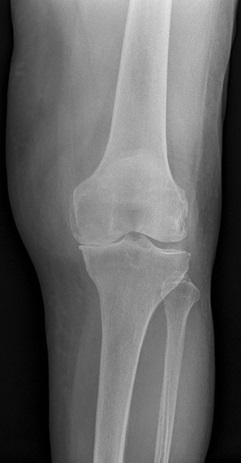

In [15]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# URL of the random knee X-ray image
image_url = "https://upload.orthobullets.com/topic/12287/images/xray6_bilateral_knee-lg.jpg"

# Download the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Convert the image to RGB mode to ensure 3 channels
img = img.convert("RGB")

display(img)


## 10. Image Preprocessing for Model Prediction


#### Explanation:

1.  **Define the Transformation Pipeline**:
    
    -   **`Resize((224, 224))`**: Resizes the image to 224x224 pixels, matching the input size expected by the model.
    -   **`ToTensor()`**: Converts the image from a PIL format to a PyTorch tensor with pixel values normalized between 0 and 1.
    -   **`Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`**: Applies normalization using the same mean and standard deviation values as those used during training. These values standardize each channel and are based on the ImageNet dataset.
2.  **Apply Transformations**:
    
    -   **`img_tensor = transform(img)`**: Applies the transformations defined above to the downloaded image.
3.  **Add Batch Dimension**:
    
    -   **`unsqueeze(0)`**: Adds an extra dimension at position 0, making the image tensor shape `[1, 3, 224, 224]`. This batch dimension is required as the model expects input in batches.

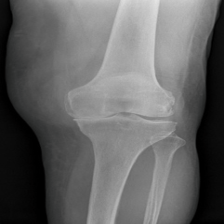

In [27]:
import torchvision.transforms as transforms

# Define the same transformations as during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply transformations to the image
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Display it
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

# Denormalize the image tensor
denorm_img = img_tensor.squeeze(0).clone()
for t, m, s in zip(denorm_img, mean, std):
    t.mul_(s).add_(m)

# Convert the denormalized tensor to a PIL image
denorm_img = denorm_img.clamp(0, 1)
denorm_img = transforms.ToPILImage()(denorm_img)

# Display the denormalized image
display(denorm_img)

## 11. Model Inference and Prediction


#### Explanation:

1.  **Set the Model to Evaluation Mode**:
    
    -   **`model.eval()`**: Puts the model in evaluation mode. This disables certain layers like dropout, which are only relevant during training, ensuring that the model’s predictions are deterministic.
2.  **Move the Image Tensor to the Correct Device**:
    
    -   **`img_tensor = img_tensor.to(device)`**: Transfers the image tensor to the same device (GPU or CPU) that the model is currently using. This is essential for avoiding errors during inference.
3.  **Perform Inference**:
    
    -   **`with torch.no_grad():`**: This context manager disables gradient calculations, which reduces memory consumption and speeds up computations since gradients are not needed for inference.
    -   **`output = model(img_tensor)`**: Passes the image tensor through the model to get the raw output scores for each class.
4.  **Get the Predicted Class**:
    
    -   **`_, predicted_class = torch.max(output, 1)`**: Uses `torch.max` to obtain the index of the maximum value in the output tensor along the specified dimension (1, which corresponds to the class scores). The first returned value (underscore `_`) represents the maximum score, while `predicted_class` contains the index of the predicted class.
    -   **`predicted_class = predicted_class.item()`**: Converts the tensor containing the predicted class index to a standard Python integer for easier handling.

In [25]:
# Set the model to evaluation mode
model.eval()

# Move the image to the same device as the model (GPU or CPU)
img_tensor = img_tensor.to(device)

# Perform inference
with torch.no_grad():
    output = model(img_tensor)

# Get the predicted class
_, predicted_class = torch.max(output, 1)
predicted_class = predicted_class.item()

print(predicted_class)


2


## 12. Mapping Prediction to Human-Readable Labels


#### Explanation:

1.  **Define Class Labels**:
    
    -   A dictionary named `class_labels` is created to map each predicted class index to its corresponding label:
        -   **`0`**: "Healthy knee (Grade 0)"
        -   **`1`**: "Doubtful (Grade 1)"
        -   **`2`**: "Minimal osteoarthritis (Grade 2)"
        -   **`3`**: "Moderate osteoarthritis (Grade 3)"
        -   **`4`**: "Severe osteoarthritis (Grade 4)"
2.  **Print the Prediction**:
    
    -   **`print(f"Model Prediction: {class_labels[predicted_class]}")`**: This line retrieves the human-readable label using the predicted class index and formats it into a string for output. The `f-string` syntax makes it easy to include variables in strings.

In [26]:
# Map the prediction to a human-readable label
class_labels = {
    0: "Healthy knee (Grade 0)",
    1: "Doubtful (Grade 1)",
    2: "Minimal osteoarthritis (Grade 2)",
    3: "Moderate osteoarthritis (Grade 3)",
    4: "Severe osteoarthritis (Grade 4)"
}

print(f"Model Prediction: {class_labels[predicted_class]}")


Model Prediction: Minimal osteoarthritis (Grade 2)


## 13. (Optional) Saving the Trained Model


#### Explanation:

1.  **Saving the Model**:
    -   **`torch.save(model.state_dict(), "arthritis_detection_model.pth")`**: This line saves the model's parameters (weights and biases) to a file named `arthritis_detection_model.pth`.
        -   **`model.state_dict()`**: Retrieves the state dictionary of the model, which contains all the learnable parameters. This is a common way to save a model in PyTorch, allowing you to later reload the parameters without needing to retrain the model.
2.  **Confirmation Message**:
    -   **`print("Model saved successfully!")`**: This line provides feedback that the model has been saved, confirming to the user that the operation was successful.

In [ ]:

# Save the trained model
torch.save(model.state_dict(), "arthritis_detection_model.pth")
print("Model saved successfully!")


Model saved successfully!
